<a href="https://colab.research.google.com/github/kirubaharan181/Twitter_Hateful_analysis/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import get_ipython
from IPython.display import display

import pandas as pd
import numpy as np
import re
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D, Dropout
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [93]:
import os
import pickle
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your Google Drive
drive_path = '/content/drive/MyDrive/Colab Notebooks/'

# Create a directory for your project if it doesn't exist
project_path = os.path.join(drive_path, 'my_project')
if not os.path.exists(project_path):
    os.makedirs(project_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# Add the lstm_model to the models dictionary
models["LSTM"] = lstm_model

In [41]:

for model_name, model in models.items():
    if hasattr(model, 'save'): # check if model has save method
        model.save(os.path.join(project_path, f'{model_name}.h5'))  # Save each model with its name and .h5 extension
    else:
        with open(os.path.join(project_path, f'{model_name}.pkl'), 'wb') as f: # save other models with .pkl extension
             pickle.dump(model, f)


# Save your data (assuming 'df' is the DataFrame you want to save)
df.to_csv(os.path.join(project_path, 'hate_speech_and_offensive_language.csv'), index=False)

In [30]:
from tensorflow.keras.models import load_model

# Load your model
# Load the saved keras model, assuming the user wants to load the LSTM model
lstm_model = load_model(os.path.join(project_path, 'LSTM.h5'))

# Load your data
data = pd.read_csv(os.path.join(project_path, 'hate_speech_and_offensive_language.csv'))

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
import pandas as pd

# Upload the CSV file to Colab
from google.colab import files
uploaded = files.upload()

# After the upload, read the CSV file
df = pd.read_csv("hate_speech_and_offensive_language.csv")

# Display the first few rows of the dataframe
df.head()

Saving hate_speech_and_offensive_language.csv to hate_speech_and_offensive_language.csv


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
print(df.head())

   count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64


In [7]:
df.dropna(inplace=True)

In [8]:
print("Dataset Shape:", df.shape)
# Check if the column name is 'class' instead of 'label'
if 'class' in df.columns:
    print("Label Distribution:\n", df["class"].value_counts())
else:
    # If 'class' is not found, print all column names for debugging
    print("Column names in the DataFrame:", df.columns)
    # You may need to adjust the column name based on the actual name in your CSV file
    # For example, if the column name is 'hate_speech', use df['hate_speech'].value_counts()

Dataset Shape: (24783, 6)
Label Distribution:
 class
1    19190
2     4163
0     1430
Name: count, dtype: int64


In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [10]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove @mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Remove stopwords & lemmatize
    return text


In [11]:
df["clean_tweet"] = df["tweet"].apply(clean_text)

In [12]:
df.to_csv("clean_tweets.csv", index=False)
print(df.head())


   count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                         clean_tweet  
0  rt woman shouldnt complain cleaning house amp ...  
1  rt boy dat coldtyga dwn bad cuffin dat hoe st ...  
2  rt dawg rt ever fuck

In [13]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df["clean_tweet"])
y = df["class"]  # Use 'class' instead of 'label' to access the target variable


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
models = {
    "SVM": SVC(kernel="linear"),
    "Naïve Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(),
    "ANN": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
}


In [16]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.2f}")


SVM Accuracy: 0.90
Naïve Bayes Accuracy: 0.84
Logistic Regression Accuracy: 0.89
Random Forest Accuracy: 0.89
k-NN Accuracy: 0.52
XGBoost Accuracy: 0.90
ANN Accuracy: 0.86


In [17]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["clean_tweet"])
X_lstm = pad_sequences(tokenizer.texts_to_sequences(df["clean_tweet"]), maxlen=100)


In [19]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

In [20]:
lstm_model = Sequential([
    Embedding(5000, 128, input_length=100),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation="sigmoid")
])


In [22]:
from tensorflow.keras.optimizers import Adam  # Import the Adam optimizer

lstm_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 105s 164ms/step - accuracy: 0.7672 - loss: -44.3281 - val_accuracy: 0.7682 - val_loss: -49.3779
Epoch 2/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 120s 129ms/step - accuracy: 0.7691 - loss: -54.4923 - val_accuracy: 0.7666 - val_loss: -57.2882
Epoch 3/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 79s 125ms/step - accuracy: 0.7661 - loss: -66.3390 - val_accuracy: 0.7634 - val_loss: -65.5592
Epoch 4/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 90s 145ms/step - accuracy: 0.7659 - loss: -75.2659 - val_accuracy: 0.7688 - val_loss: -74.0680
Epoch 5/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 145s 150ms/step - accuracy: 0.7770 - loss: -82.4583 - val_accuracy: 0.7539 - val_loss: -81.8825


In [31]:
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Initialize the bert model with num_labels = 3 to match our data
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

X_train_bert = bert_tokenizer(df["clean_tweet"].tolist(), padding=True, truncation=True, max_length=128, return_tensors="tf")
bert_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
bert_model.fit(X_train_bert["input_ids"], y, epochs=3, batch_size=16)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
1549/1549 [==============================] - 10092s 6s/step - loss: 1.1077 - accuracy: 0.1239
Epoch 2/3
1549/1549 [==============================] - 10167s 7s/step - loss: 1.0986 - accuracy: 0.1214
Epoch 3/3
1549/1549 [==============================] - 10271s 7s/step - loss: 1.0986 - accuracy: 0.1234


In [33]:
for name, model in models.items():
    preds = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, preds):.2f}, Precision: {precision_score(y_test, preds, average='weighted'):.2f}, Recall: {recall_score(y_test, preds, average='weighted'):.2f}, F1 Score: {f1_score(y_test, preds, average='weighted'):.2f}")


SVM - Accuracy: 0.90, Precision: 0.89, Recall: 0.90, F1 Score: 0.89
Naïve Bayes - Accuracy: 0.84, Precision: 0.83, Recall: 0.84, F1 Score: 0.81
Logistic Regression - Accuracy: 0.89, Precision: 0.88, Recall: 0.89, F1 Score: 0.88
Random Forest - Accuracy: 0.89, Precision: 0.88, Recall: 0.89, F1 Score: 0.88
k-NN - Accuracy: 0.52, Precision: 0.75, Recall: 0.52, F1 Score: 0.56
XGBoost - Accuracy: 0.90, Precision: 0.89, Recall: 0.90, F1 Score: 0.89
ANN - Accuracy: 0.86, Precision: 0.86, Recall: 0.86, F1 Score: 0.86
155/155 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step
LSTM - Accuracy: 0.77, Precision: 0.60, Recall: 0.77, F1 Score: 0.67


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [89]:
def predict_tweet(tweet):
    clean_tweet = clean_text(tweet)
    vectorized_tweet = vectorizer.transform([clean_tweet])
    lstm_input = pad_sequences(tokenizer.texts_to_sequences([clean_tweet]), maxlen=100)

    svm_pred = models["SVM"].predict(vectorized_tweet)[0]
    lstm_pred = lstm_model.predict(lstm_input)[0][0]


    print(f"SVM Prediction: {'Hate Speech' if svm_pred == 1 else 'Not Hate Speech'}")
    print(f"LSTM Prediction: {'Hate Speech' if lstm_pred > 1 else 'Not Hate Speech'}")
    return svm_pred, lstm_pred



In [92]:
def predict_tweet(tweet):
    clean_tweet = clean_text(tweet)
    vectorized_tweet = vectorizer.transform([clean_tweet])
    lstm_input = pad_sequences(tokenizer.texts_to_sequences([clean_tweet]), maxlen=100)
    bert_input = bert_tokenizer([clean_tweet], padding=True, truncation=True, max_length=128, return_tensors="tf")

    predictions = {}

    # Make predictions for each model
    for model_name in ["SVM", "Naïve Bayes", "Logistic Regression", "Random Forest", "k-NN", "XGBoost", "ANN", "BERT", "LSTM"]:
      if model_name in models:
        model = models[model_name]
        if model_name == "LSTM":
            lstm_pred = lstm_model.predict(lstm_input)[0][0]
            predictions[model_name] = 1 if lstm_pred > 0.5 else 0
            print(f"LSTM Prediction: {'Hate Speech' if lstm_pred > 0.5 else 'Not Hate Speech'}")
        else:
            model_pred = model.predict(vectorized_tweet)[0]
            predictions[model_name] = model_pred
            print(f"{model_name} Prediction: {'Hate Speech' if model_pred == 1 else 'Not Hate Speech'}")
      elif model_name == "BERT":
        # BERT prediction
          bert_output = bert_model.predict(bert_input["input_ids"])
          bert_pred = np.argmax(bert_output.logits, axis=1)[0] # Get the class with highest probability.
          predictions[model_name] = bert_pred
          print(f"BERT Prediction: {'Hate Speech' if bert_pred == 1 else 'Not Hate Speech'}")


    return predictions

# Example usage:
predictions = predict_tweet("I hate this person! They are so bitch.")
print(predictions)

SVM Prediction: Hate Speech
Naïve Bayes Prediction: Hate Speech
Logistic Regression Prediction: Hate Speech
Random Forest Prediction: Hate Speech
k-NN Prediction: Not Hate Speech
XGBoost Prediction: Hate Speech
ANN Prediction: Not Hate Speech
1/1 [==============================] - 5s 5s/step
BERT Prediction: Not Hate Speech
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
LSTM Prediction: Hate Speech
{'SVM': 1, 'Naïve Bayes': 1, 'Logistic Regression': 1, 'Random Forest': 1, 'k-NN': 2, 'XGBoost': 1, 'ANN': 0, 'BERT': 2, 'LSTM': 1}


In [90]:

predict_tweet("You're so stupid and useless!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
SVM Prediction: Hate Speech
LSTM Prediction: Not Hate Speech


(1, 1.0)

In [91]:
predict_tweet("Everyone deserves kindness and respect .")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
SVM Prediction: Not Hate Speech
LSTM Prediction: Not Hate Speech


(2, 1.0)

In [36]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

155/155 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


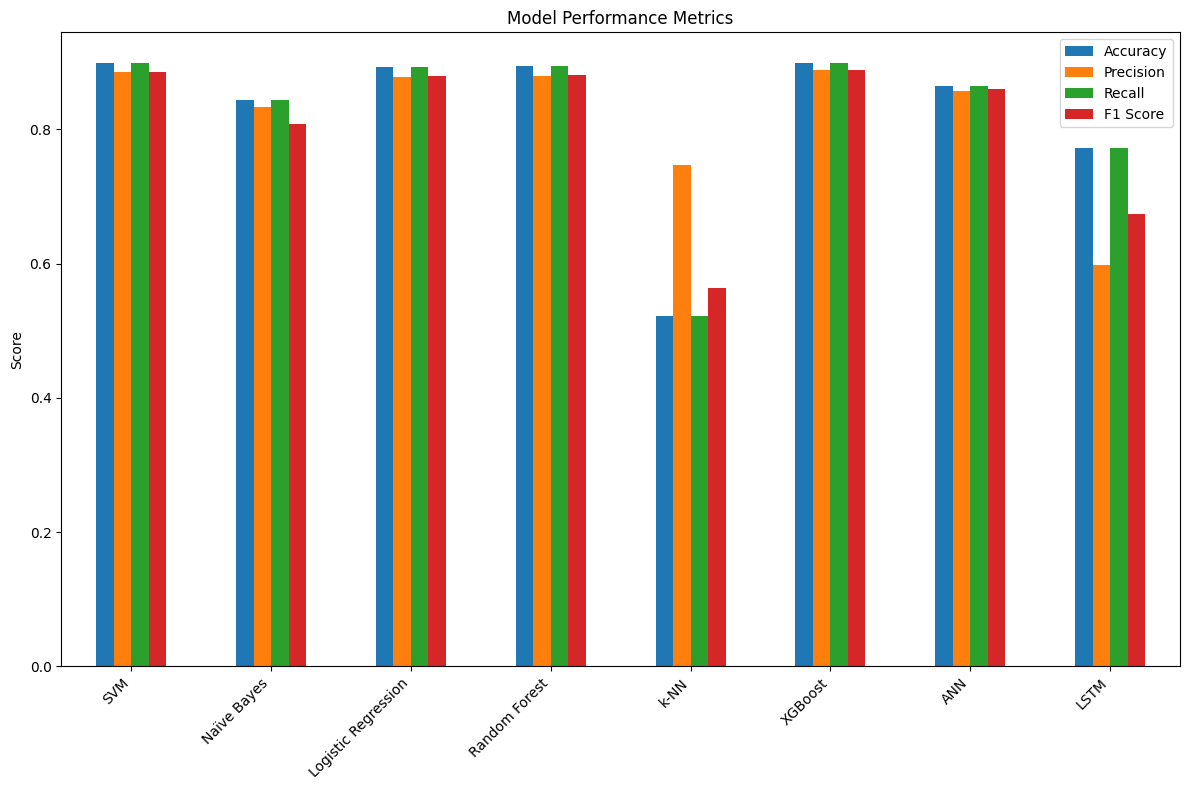

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

metrics = {}
for name, model in models.items():
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    metrics[name] = [accuracy, precision, recall, f1]

# Convert the metrics dictionary into a pandas DataFrame
import pandas as pd
df_metrics = pd.DataFrame.from_dict(metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plotting the bar chart
df_metrics.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

155/155 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


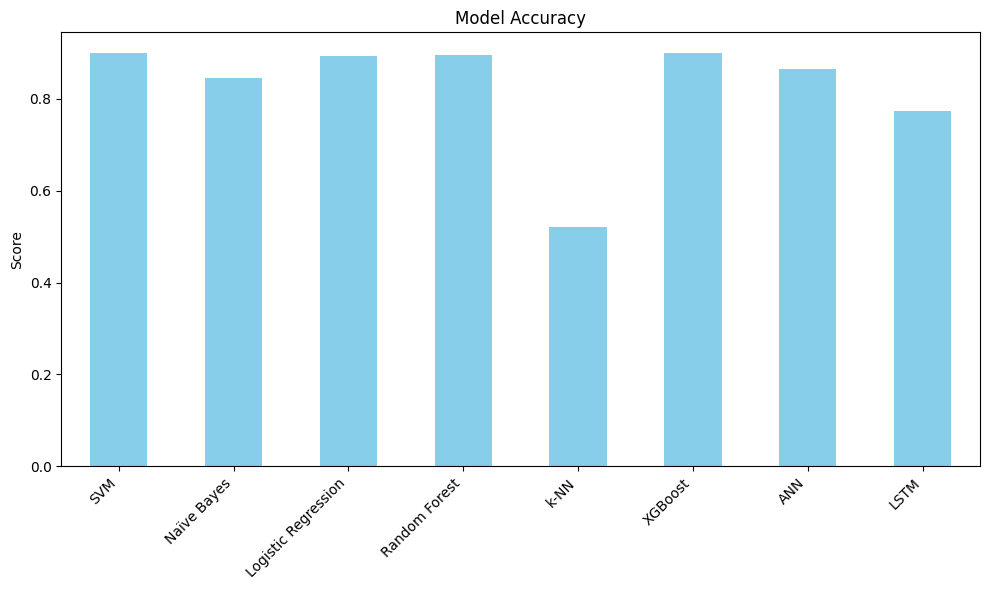

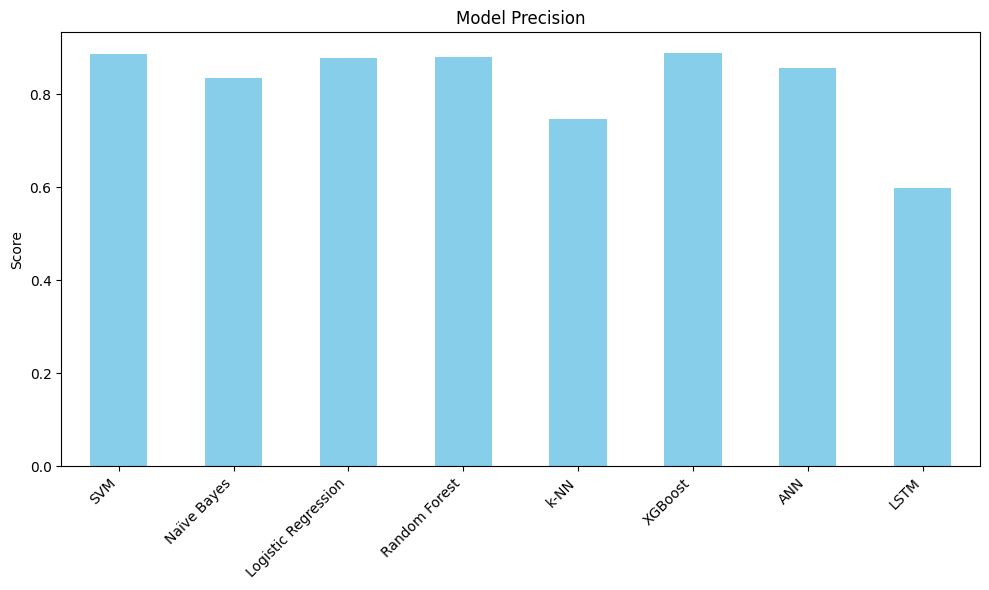

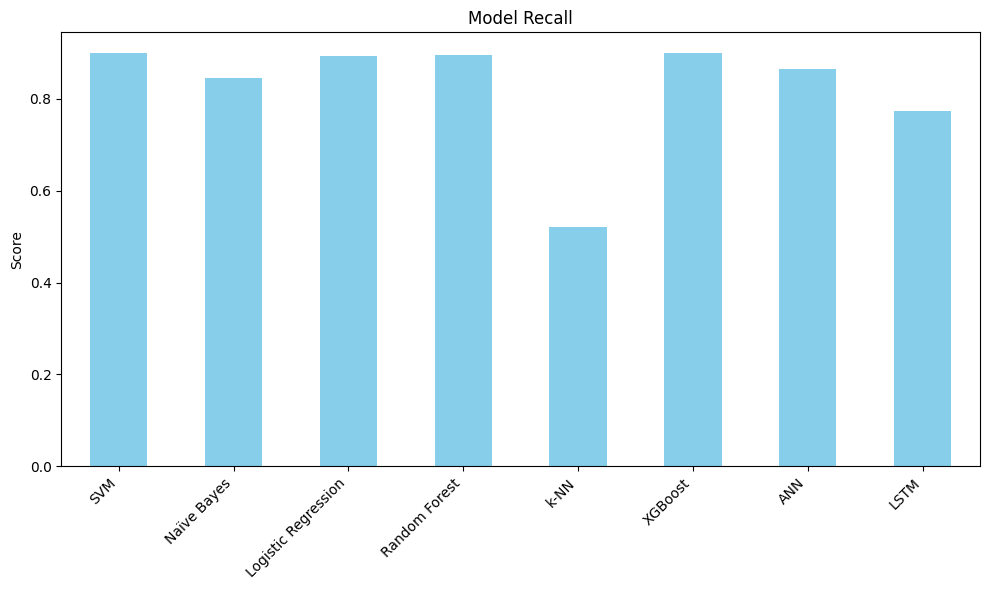

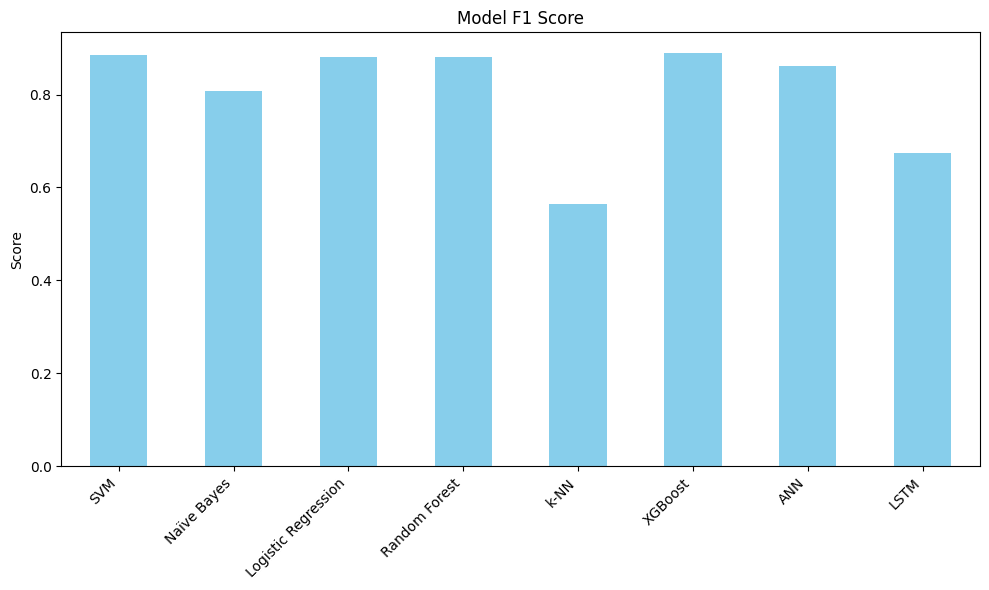

In [38]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


metrics = {}
for name, model in models.items():
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    metrics[name] = [accuracy, precision, recall, f1]

# Convert the metrics dictionary into a pandas DataFrame
df_metrics = pd.DataFrame.from_dict(metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])


# Plotting each metric in a separate bar chart
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics_list:
    plt.figure(figsize=(10, 6))  # Create a new figure for each metric
    df_metrics[metric].plot(kind='bar', color='skyblue') # Use a single color for each bar
    plt.title(f'Model {metric}')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

155/155 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


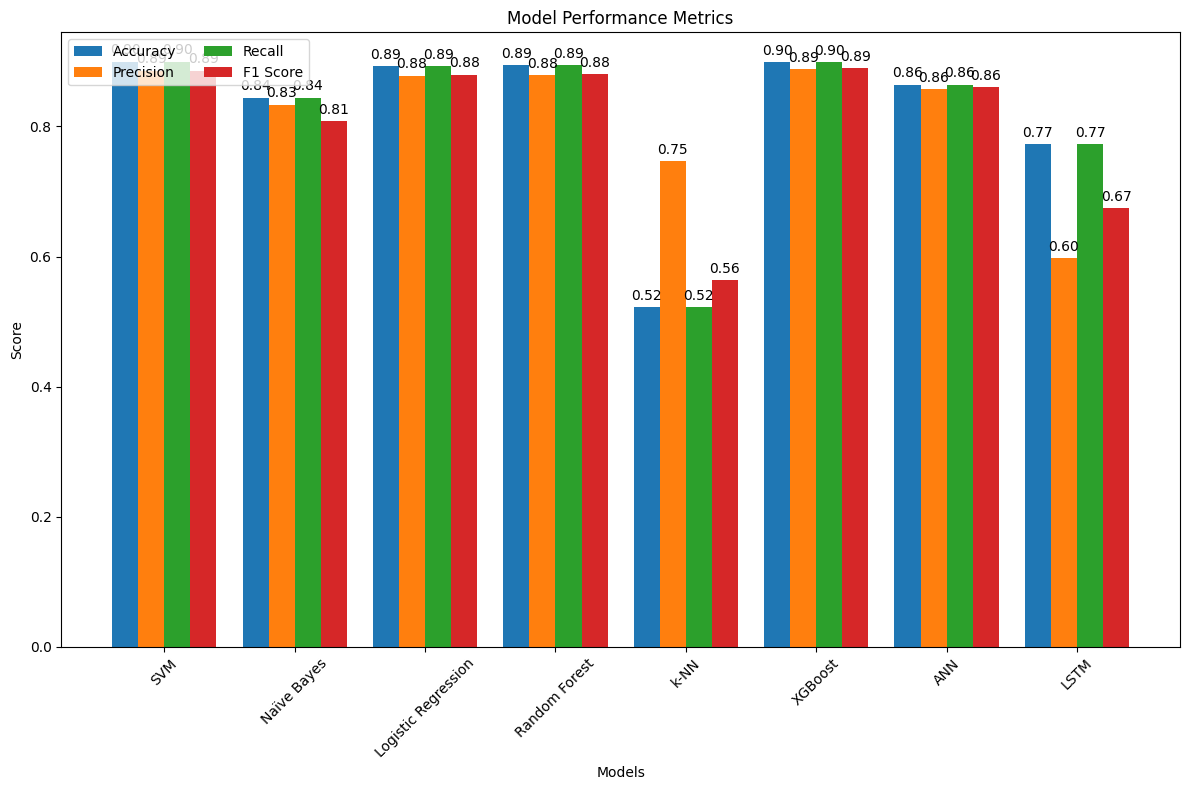

In [42]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metrics = {}
for name, model in models.items():
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    metrics[name] = [accuracy, precision, recall, f1]

# Convert the metrics dictionary into a pandas DataFrame
df_metrics = pd.DataFrame.from_dict(metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])


# Set up the plot
model_names = df_metrics.index
metric_names = df_metrics.columns
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 8))

# loop through metrics and plot them
for metric in metric_names:
  offset = width * multiplier
  rects = ax.bar(x + offset, df_metrics[metric], width, label=metric)
  ax.bar_label(rects, padding=3, fmt='%.2f') # Add labels to each bar
  multiplier += 1

# Add labels and formatting
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x + width*1.5, model_names)
ax.legend(loc='upper left', ncols=2) # adjust legend position and columns
ax.tick_params(axis='x', rotation=45) # Rotate model name labels
fig.tight_layout()
plt.show()

In [48]:
import joblib

joblib.dump(model, "sentiment_model.pkl")  # Save the trained model
print("Model saved successfully!")


Model saved successfully!


In [49]:
model.save("sentiment_model.h5")  # Save in HDF5 format
print("Model saved successfully!")


Model saved successfully!


In [46]:
import torch

# Save the entire model (not just state_dict)
torch.save(model, "sentiment_model.pth")
print("Model saved successfully!")



Model saved successfully!


In [50]:
import joblib

# Save the trained model
joblib.dump(model, "/content/drive/My Drive/sentiment_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [55]:
import joblib

# Save tokenizer inside Google Colab
joblib.dump(tokenizer, "tokenizer.pkl")

print("Tokenizer saved successfully in Google Colab!")


Tokenizer saved successfully in Google Colab!


In [56]:
from google.colab import files
files.download("tokenizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
sample_text = ["I hate this!", "You are amazing!"]
tokenized_sample = tokenizer.texts_to_sequences(sample_text)
padded_sample = pad_sequences(tokenized_sample, maxlen=100)
prediction = model.predict(padded_sample)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.]
 [1.]]


In [58]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample test inputs
sample_texts = ["I hate you", "You are kind", "This is terrible", "I love this"]

# Tokenize and pad input
tokenized_sample = tokenizer.texts_to_sequences(sample_texts)
padded_sample = pad_sequences(tokenized_sample, maxlen=100)

# Make predictions
predictions = model.predict(padded_sample)

# Print raw model outputs
print("Raw Predictions:\n", predictions)

# Convert predictions to class labels
predicted_classes = (predictions > 0.5).astype(int)  # If sigmoid activation is used
print("Predicted Classes:\n", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
Raw Predictions:
 [[1.]
 [1.]
 [1.]
 [1.]]
Predicted Classes:
 [[1]
 [1]
 [1]
 [1]]
